In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Preparing data

In [2]:
import gym

## Loading environment

In [3]:
env = gym.make('Breakout-v0')

## Acquiring two images

In [11]:
s = env.reset()
s2,reward,done,info = env.step(env.action_space.sample()) # take a random action

In [12]:
env.action_space.n

4

In [13]:
print(s.shape)
print(s2.shape)

(210, 160, 3)
(210, 160, 3)


In [14]:
from PIL import Image

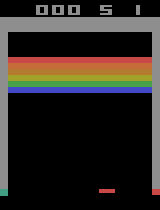

In [15]:
Image.fromarray(s)

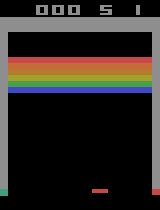

In [16]:
Image.fromarray(s2)

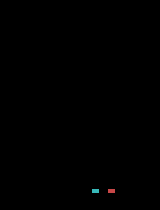

In [17]:
Image.fromarray(s - s2)

# Start building model

https://keras.io/getting-started/functional-api-guide/

In [31]:
import keras
from keras.layers import Input, LSTM, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.layers import concatenate
from keras.models import Model
from keras.utils import plot_model

In [19]:
input_shape = s.shape

## Simple model with one frame

In [20]:
input1 = Input(shape=input_shape)
conv1 = Conv2D(32,(3,3),padding="same",activation="relu")(input1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
drop1 = Dropout(0.25)(pool1)

conv2 = Conv2D(64,(3,3),padding="same",activation="relu")(drop1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
drop2 = Dropout(0.25)(pool2)

hidden1 = Flatten()(drop2)
hidden2 = Dense(128, activation='relu')(hidden1)
output = Dense(env.action_space.n, activation='softmax')(hidden2)

In [21]:
model = Model(inputs=input1, outputs=output)

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
import pydot

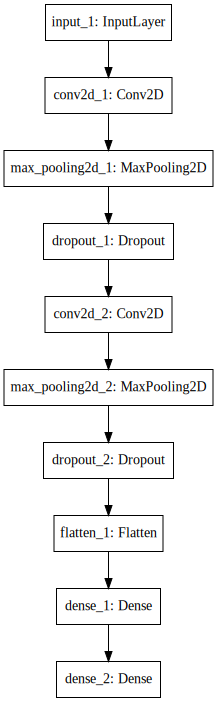

In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [54]:
x = model.predict(np.expand_dims(s,axis=0))

In [55]:
x.shape

(1, 4)

In [56]:
x

array([[7.8612364e-05, 5.2136744e-22, 9.9992132e-01, 1.2423177e-09]],
      dtype=float32)

## Model with two frames

In [28]:
input_image = Input(shape=input_shape)
conv1 = Conv2D(32,(3,3),padding="same",activation="relu")(input_image)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
drop1 = Dropout(0.25)(pool1)

conv2 = Conv2D(64,(3,3),padding="same",activation="relu")(drop1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
drop2 = Dropout(0.25)(pool2)

out = Flatten()(drop2)

vision_model = Model(inputs=input_image, outputs=out)

In [29]:
input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

In [30]:
out1 = vision_model(input1)
out2 = vision_model(input2)

In [32]:
concatenated = concatenate([out1,out2])

In [33]:
hidden = Dense(128, activation='relu')(concatenated)
output = Dense(env.action_space.n, activation='softmax')(hidden)

In [34]:
model = Model([input1, input2], output)

In [36]:
model.predict([np.expand_dims(s,axis= 0),np.expand_dims(s2,axis= 0)])

array([[1.3477243e-06, 2.6075964e-17, 9.9999869e-01, 1.4398999e-14]],
      dtype=float32)

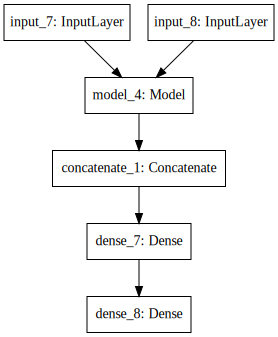

In [37]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))